In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Explore Shared Articles Data

In [3]:
df = pd.read_csv("shared_articles.csv")

In [4]:
df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
timestamp          3122 non-null int64
eventType          3122 non-null object
contentId          3122 non-null int64
authorPersonId     3122 non-null int64
authorSessionId    3122 non-null int64
authorUserAgent    680 non-null object
authorRegion       680 non-null object
authorCountry      680 non-null object
contentType        3122 non-null object
url                3122 non-null object
title              3122 non-null object
text               3122 non-null object
lang               3122 non-null object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [6]:
df.shape


(3122, 13)

In [9]:
df.isnull().sum()

timestamp             0
eventType             0
contentId             0
authorPersonId        0
authorSessionId       0
authorUserAgent    2442
authorRegion       2442
authorCountry      2442
contentType           0
url                   0
title                 0
text                  0
lang                  0
dtype: int64

In [17]:
df.describe()

,timestamp,contentId,authorPersonId,authorSessionId
count,3.122000e+03,3.122000e+03,3.122000e+03,3.122000e+03
mean,1.468804e+09,3.284110e+16,3.984819e+17,1.976675e+17
std,7.571512e+06,5.383734e+18,4.387115e+18,5.403753e+18
min,1.459193e+09,-9.222795e+18,-9.120686e+18,-9.212055e+18
25%,1.462369e+09,-4.660869e+18,-1.578288e+18,-4.651280e+18
50%,1.467136e+09,4.436584e+16,-7.092877e+17,4.154103e+17
75%,1.473873e+09,4.745617e+18,3.609194e+18,4.841644e+18
max,1.488308e+09,9.222265e+18,9.210531e+18,9.221043e+18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12144a048>,
      dtype=object)

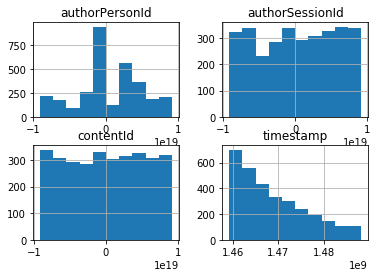

In [24]:
import matplotlib as plt
df.hist()


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

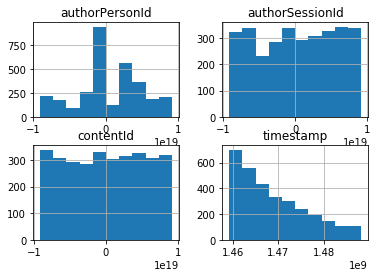

In [27]:
df['timestamp']

# Explore User Interactions Data

In [10]:
df1 = pd.read_csv("users_interactions.csv")

In [11]:
df1.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
timestamp      72312 non-null int64
eventType      72312 non-null object
contentId      72312 non-null int64
personId       72312 non-null int64
sessionId      72312 non-null int64
userAgent      56918 non-null object
userRegion     56907 non-null object
userCountry    56918 non-null object
dtypes: int64(4), object(4)
memory usage: 4.4+ MB


In [14]:
df1.shape

(72312, 8)

In [13]:
df1.isnull().sum()

timestamp          0
eventType          0
contentId          0
personId           0
sessionId          0
userAgent      15394
userRegion     15405
userCountry    15394
dtype: int64

In [16]:
df1.describe()

,timestamp,contentId,personId,sessionId
count,7.231200e+04,7.231200e+04,7.231200e+04,7.231200e+04
mean,1.470103e+09,-3.033423e+16,1.252026e+16,3.421273e+16
std,7.258130e+06,5.344755e+18,5.022333e+18,5.344355e+18
min,1.457964e+09,-9.222795e+18,-9.223122e+18,-9.222505e+18
25%,1.464876e+09,-4.726309e+18,-3.596627e+18,-4.613476e+18
50%,1.468343e+09,1.893099e+16,-1.088422e+17,5.029492e+16
75%,1.474461e+09,4.441012e+18,3.766319e+18,4.667962e+18
max,1.488310e+09,9.222265e+18,9.210531e+18,9.223314e+18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1215e1828>,
      dtype=object)

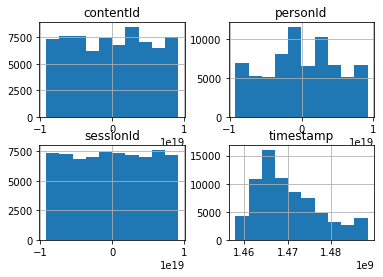

In [25]:
df1.hist()